Predicción del precio de vehículos a partir de sus características principales

La intención de este notebook es analizar un conjunto de datos de automóviles con el objetivo de predecir su precio a partir de diferentes características relevantes. El dataset utilizado contiene información asociada a distintos atributos, como el kilometraje, la marca, el año de registro, el tipo de caja de cambios, el estado del vehículo en cuanto a reparaciones previas, ubicación del vendedor y el tipo de combustible, los cuales representan factores comúnmente considerados en el mercado automotor.

En una primera etapa, se realiza un análisis exploratorio de los datos (EDA) con el fin de comprender la distribución de las variables, identificar patrones, detectar valores atípicos y analizar posibles relaciones entre los atributos y el precio. Posteriormente, se entrena un modelo predictivo capaz de estimar el valor de un automóvil a partir de sus características principales.

Los resultados obtenidos permiten comprender cómo ciertos atributos influyen en el valor de mercado de los automóviles, lo que puede servir como apoyo en la toma de decisiones relacionadas con la compra y venta de vehículos.

Hipotesis:

- 1. Existe una relación inversa entre el kilometraje y el precio del vehículo: a menor kilometraje, mayor es el precio del auto.
- 2. El precio promedio de los vehículos varía según la marca del vehículo.
- 3. Los vehículos con un año de registro más reciente tienden a tener un precio mayor.3
- 4. La ubicación del vendedor influye en el precio del vehículo.

In [ ]:
pip install pandas numpy matplotlib seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("1_car_pricing.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [7]:
df.isna().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Dado que las variables vehicleType, gearbox, model, fuelType y notRepairedDamage presentan una proporción considerable de valores faltantes, es mejor excluirlas del análisis exploratorio con el fin de evitar sesgos y asegurar la calidad de los resultados.

In [8]:
df_clean = df.copy()

In [9]:
df_clean = df_clean[df_clean['price'] > 0]
df_clean = df_clean[df_clean['price'] <= 100000]

In [10]:
df_clean = df_clean[
    (df_clean['yearOfRegistration'] >= 1950) &
    (df_clean['yearOfRegistration'] <= 2025)
]

In [11]:
df_clean = df_clean[df_clean['kilometer'] > 0]

Se realiza una copia del dataset original denominada df_clean. Posteriormente, se lleva a cabo un proceso de limpieza mediante la eliminación de valores atípicos e inconsistentes en las variables principales del análisis, tales como el precio, el año de registro y el kilometraje. Estos filtros se aplican con el fin de garantizar la coherencia de los datos y asegurar un análisis alineado con las hipótesis planteadas.

In [ ]:
cols_to_drop = [
    'index', 'dateCrawled', 'name', 'seller', 'offerType', 'abtest',
    'dateCreated', 'nrOfPictures', 'lastSeen',
    'monthOfRegistration', 'vehicleType', 'gearbox', 'model',
    'fuelType', 'notRepairedDamage'
]

df_clean.drop(columns=cols_to_drop, inplace=True)


KeyError: "['index', 'dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'dateCreated', 'nrOfPictures', 'lastSeen', 'monthOfRegistration', 'vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage'] not found in axis"

Se eliminan aquellas columnas que no aportan información relevante para el análisis exploratorio ni para la evaluación de las hipótesis planteadas. Esta depuración permite simplificar el dataset, reducir ruido innecesario y enfocar el análisis en las variables directamente relacionadas con el precio del vehículo.

In [13]:
df_clean['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'chrysler', 'jaguar', 'daewoo',
       'rover', 'saab', 'land_rover', 'lada'], dtype=object)

In [20]:
map_brand = { 'volkswagen': 0, 'audi': 1, 'jeep': 2, 'skoda': 3, 'bmw': 4, 'peugeot': 5, 'ford': 6, 'mazda': 7, 'nissan': 8, 'renault': 9, 'mercedes_benz': 10, 'opel': 11, 'seat': 12, 'citroen': 13, 'honda': 14, 'fiat': 15, 'mini': 16, 'smart': 17, 'hyundai': 18, 'sonstige_autos': 19, 'alfa_romeo': 20, 'subaru': 21, 'volvo': 22, 'mitsubishi': 23, 'kia': 24, 'suzuki': 25, 'lancia': 26, 'porsche': 27, 'toyota': 28, 'chevrolet': 29, 'dacia': 30, 'daihatsu': 31, 'trabant': 32, 'chrysler': 33, 'jaguar': 34, 'daewoo': 35, 'rover': 36, 'saab': 37, 'land_rover': 38, 'lada': 39 }
df_clean['id_brand'] = df_clean['brand'].map(map_brand)

Se identificaron las distintas marcas de autos presentes en el dataset y se realizó un proceso de mapeo para asignar a cada una un número id. Este identificador fue almacenado en una nueva columna llamada id_brand, la cual será utilizada posteriormente para la disminución de ruido en algunas graficas. 

In [35]:
df_clean[['brand', 'id_brand']].drop_duplicates().sort_values('id_brand')

,brand,id_brand
0,volkswagen,0
1,audi,1
2,jeep,2
4,skoda,3
5,bmw,4
6,peugeot,5
8,ford,6
10,mazda,7
14,nissan,8
17,renault,9


In [38]:
df_clean[df_clean['id_brand'].isna()]['brand'].unique()

array([], dtype=object)

Confirmación de que no hay valores nulos en la nueva columna id_brand y todas las marcas poseen su respectivo id.

In [36]:
df_clean.shape

(360038, 6)

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360038 entries, 0 to 371527
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               360038 non-null  int64 
 1   yearOfRegistration  360038 non-null  int64 
 2   powerPS             360038 non-null  int64 
 3   kilometer           360038 non-null  int64 
 4   brand               360038 non-null  object
 5   id_brand            360038 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 19.2+ MB


In [45]:
df_clean.head(15)

,price,yearOfRegistration,powerPS,kilometer,brand,id_brand
0,480,1993,0,150000,volkswagen,0
1,18300,2011,190,125000,audi,1
2,9800,2004,163,125000,jeep,2
3,1500,2001,75,150000,volkswagen,0
4,3600,2008,69,90000,skoda,3
5,650,1995,102,150000,bmw,4
6,2200,2004,109,150000,peugeot,5
8,14500,2014,125,30000,ford,6
9,999,1998,101,150000,volkswagen,0
10,2000,2004,105,150000,mazda,7


In [41]:
df_clean.describe()

,price,yearOfRegistration,powerPS,kilometer,id_brand
count,360038.000000,360038.000000,360038.000000,360038.000000,360038.000000
mean,5772.758909,2003.485343,116.315517,125814.455696,7.777590
std,7541.966209,7.427983,188.502462,39652.219814,7.672804
min,1.000000,1950.000000,0.000000,5000.000000,0.000000
25%,1250.000000,1999.000000,72.000000,125000.000000,1.000000
50%,3000.000000,2004.000000,105.000000,150000.000000,6.000000
75%,7450.000000,2008.000000,150.000000,150000.000000,11.000000
max,100000.000000,2019.000000,20000.000000,150000.000000,39.000000


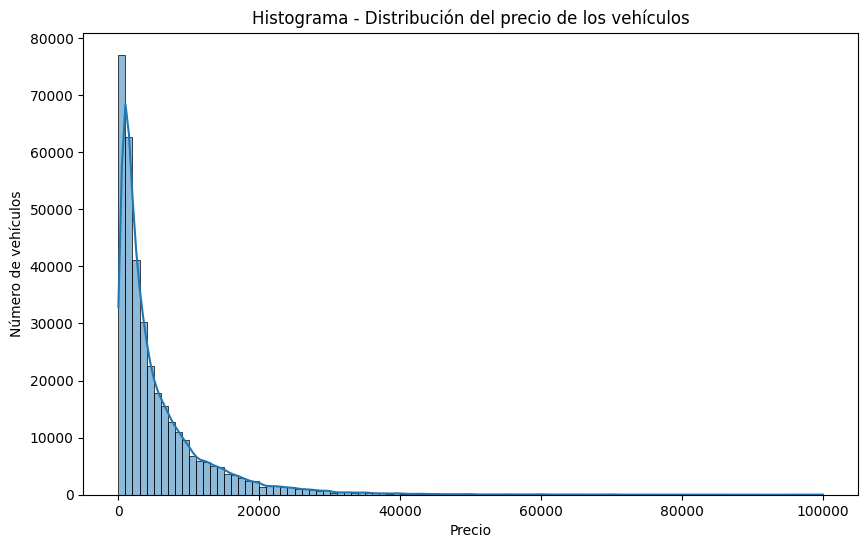

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=100, kde=True)

plt.title('Histograma - Distribución del precio de los vehículos')
plt.xlabel('Precio')
plt.ylabel('Número de vehículos')

plt.show()

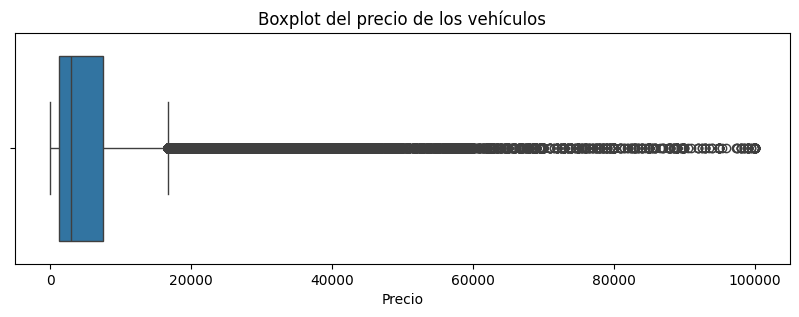

In [43]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clean['price'])

plt.title('Boxplot del precio de los vehículos')
plt.xlabel('Precio')

plt.show()


El histograma y el boxplot muestran que la distribución del precio de los vehículos es asimétrica hacia la derecha, lo que indica que la mayoría de los autos se concentran en rangos de precio bajos, mientras que existe una menor cantidad de vehículos con precios elevados. 

El boxplot confirma este comportamiento, ya que la mediana se encuentra más cercana a los valores bajos y se observan varios valores atípicos en el extremo superior. Estos outliers no representan errores, sino vehículos de alto valor o exclusivos.

Hipotesis 1: Existe una relación inversa entre el kilometraje y el precio del vehículo: a menor kilometraje, mayor es el precio del auto.

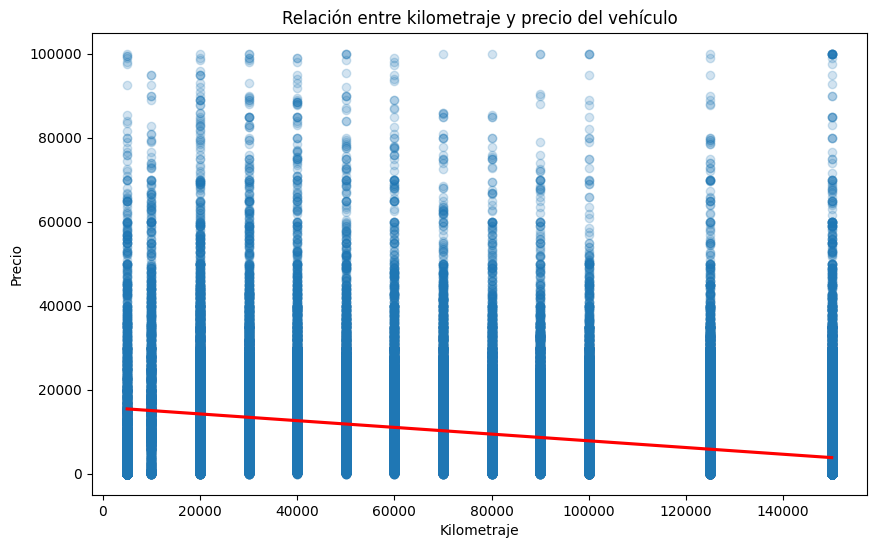

In [64]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='kilometer',
    y='price',
    data=df_clean,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)

plt.title('Relación entre kilometraje y precio del vehículo')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')

plt.show()


Debido a la alta concentración de observaciones, el gráfico de dispersión presenta un nivel elevado de ruido, lo que dificulta identificar la relación de forma directa. Sin embargo, al apoyarse en la línea de tendencia se observa una disminución progresiva del precio a medida que aumenta el kilometraje. Esto indica que, en general, los vehículos con mayor recorrido tienden a tener un precio más bajo.

In [68]:
df_clean['km_group'] = pd.cut(
    df_clean['kilometer'],
    bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000],
    labels=['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-150k', '150k-200k']
)

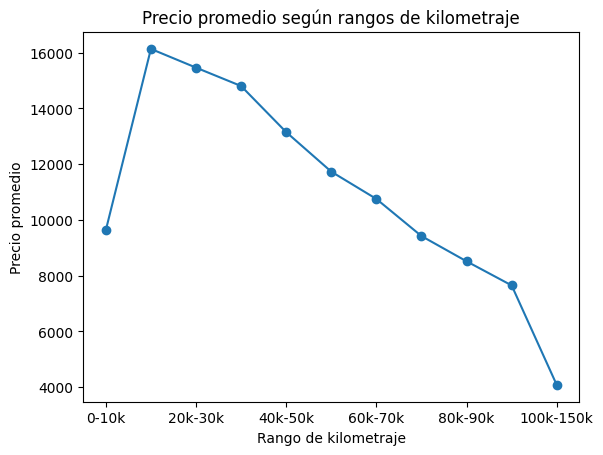

In [71]:
price_by_km = df_clean.groupby('km_group', observed=False)['price'].mean()

price_by_km.plot(kind='line', marker='o')

plt.title('Precio promedio según rangos de kilometraje')
plt.xlabel('Rango de kilometraje')
plt.ylabel('Precio promedio')

plt.show()

Se utiliza una visualización alternativa basada en el precio promedio por rangos de kilometraje. Esta gráfica permite observar de manera más clara una tendencia decreciente del precio conforme aumenta el kilometraje, mostrando de forma más evidente la relación inversa entre ambas variables y reduciendo el ruido presente en el scatterplot.

Hipotesis 2: El precio promedio de los vehículos varía según la marca del vehículo.

In [72]:
price_by_brand = (
    df_clean
    .groupby('brand')['price']
    .mean()
    .sort_values(ascending=False)
)

price_by_brand

brand
porsche           33684.327425
land_rover        16602.378808
jaguar            12091.081531
sonstige_autos    11274.179581
jeep              11028.569782
mini               9954.957105
audi               8925.432209
bmw                8301.620306
mercedes_benz      8293.546833
chevrolet          7039.747763
skoda              6462.143165
dacia              5905.268539
kia                5787.964357
hyundai            5499.467409
volkswagen         5311.416806
toyota             5278.410556
volvo              5202.420321
nissan             4651.248623
seat               4452.724451
subaru             4396.305741
alfa_romeo         4252.098585
chrysler           4103.039913
mazda              4030.208845
suzuki             3983.377856
honda              3946.573153
saab               3901.005780
citroen            3693.147012
ford               3636.095434
smart              3582.753962
mitsubishi         3339.101283
lancia             3260.053191
peugeot            3229.614680
la

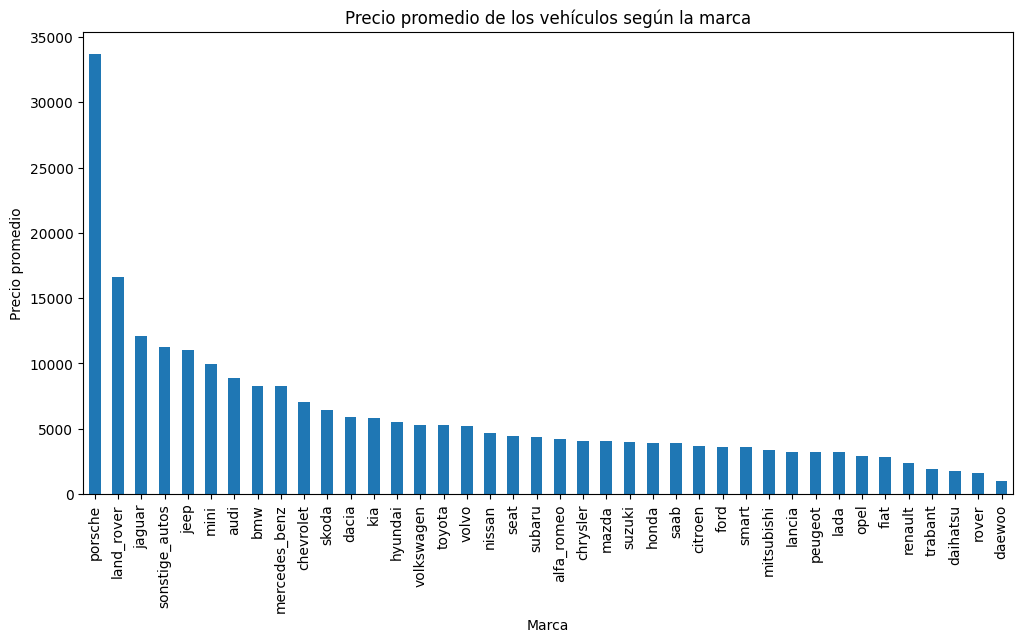

In [74]:
plt.figure(figsize=(12, 6))

price_by_brand.plot(kind='bar')

plt.title('Precio promedio de los vehículos según la marca')
plt.xlabel('Marca')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)

plt.show()

El análisis del precio promedio por marca muestra diferencias claras entre los fabricantes. Marcas como Land Rover y Jaguar presentan precios promedio elevados; sin embargo, Porsche destaca por tener el mayor precio promedio, lo que refleja una mayor valorización de sus vehículos dentro del mercado analizado.

Por otro lado, marcas como Daewoo, Rover y Daihatsu se concentran en rangos de precio más bajos. Estos resultados indican que el precio del vehículo varía de manera significativa según la marca.

Hipótesis 3: Los vehículos con un año de registro más reciente tienden a tener un precio mayor.

In [79]:
price_by_year = (
    df_clean
    .groupby('yearOfRegistration')['price']
    .mean()
)

price_by_year

yearOfRegistration
1950    12757.809524
1951    22866.562500
1952    14409.000000
1953    10772.187500
1954    16806.846154
            ...     
2015    24513.395992
2016     3019.290309
2017     3461.627451
2018     3869.591243
2019     5943.411765
Name: price, Length: 70, dtype: float64

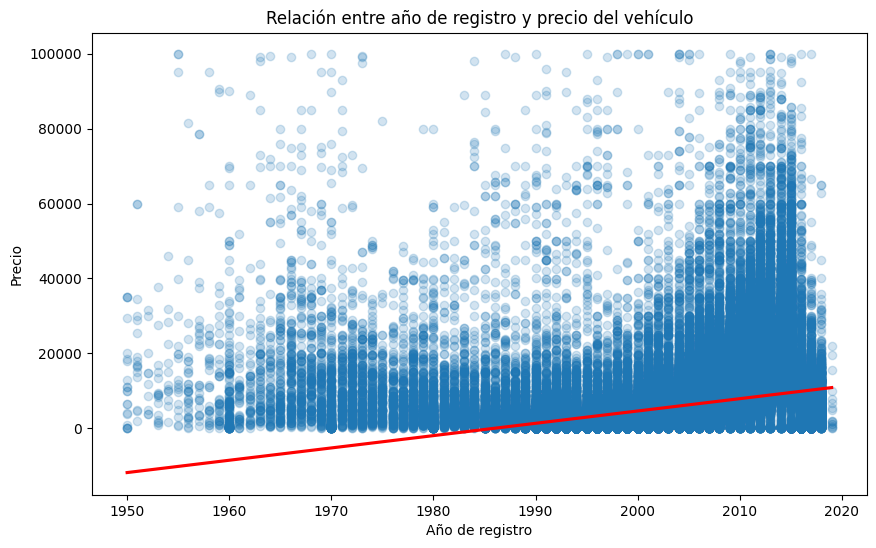

In [75]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x='yearOfRegistration',
    y='price',
    data=df_clean,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)

plt.title('Relación entre año de registro y precio del vehículo')
plt.xlabel('Año de registro')
plt.ylabel('Precio')

plt.show()


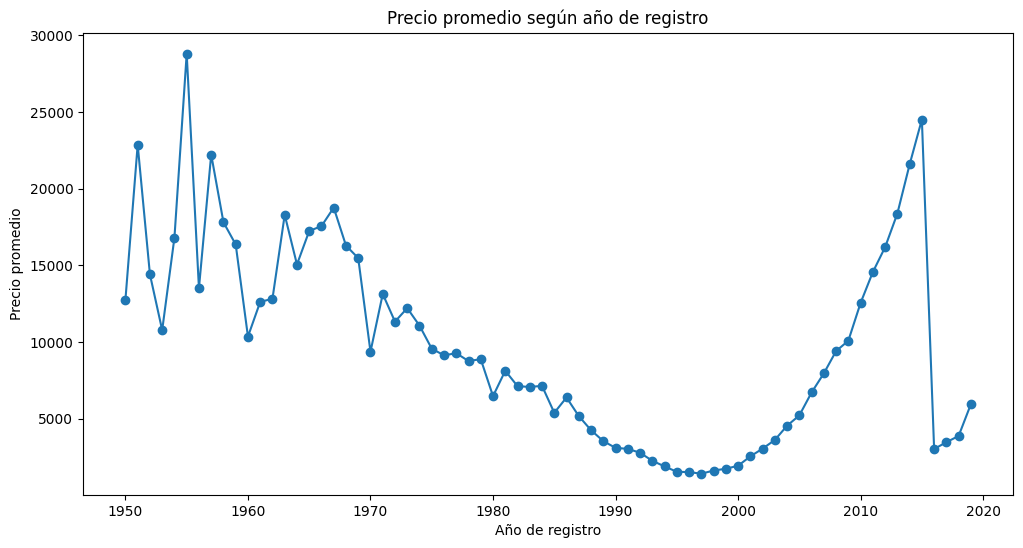

In [77]:
price_by_year = (
    df_clean
    .groupby('yearOfRegistration')['price']
    .mean()
)

plt.figure(figsize=(12, 6))
price_by_year.plot(kind='line', marker='o')

plt.title('Precio promedio según año de registro')
plt.xlabel('Año de registro')
plt.ylabel('Precio promedio')

plt.show()


In [90]:
pd.set_option('display.max_rows', None)

df_clean['yearOfRegistration'].value_counts().sort_index()


yearOfRegistration
1950       21
1951       16
1952       10
1953       16
1954       13
1955       20
1956       30
1957       26
1958       29
1959       41
1960      158
1961       47
1962       47
1963       73
1964       75
1965      119
1966      156
1967      132
1968      141
1969      150
1970      317
1971      187
1972      238
1973      194
1974      197
1975      145
1976      174
1977      188
1978      297
1979      295
1980      527
1981      268
1982      319
1983      426
1984      404
1985      691
1986      538
1987      655
1988      923
1989     1252
1990     2501
1991     2654
1992     2893
1993     3295
1994     4643
1995     8993
1996    10408
1997    14022
1998    17218
1999    22030
2000    23117
2001    19738
2002    18820
2003    19604
2004    19469
2005    21723
2006    20000
2007    17500
2008    16026
2009    15496
2010    12250
2011    11987
2012     9348
2013     6100
2014     4754
2015     2894
2016     9173
2017     9996
2018     3814
2019       17
N

In [94]:
year_counts = df_clean['yearOfRegistration'].value_counts()
valid_years = year_counts[year_counts >= 10000].index

df_clean_year = df_clean[df_clean['yearOfRegistration'].isin(valid_years)]

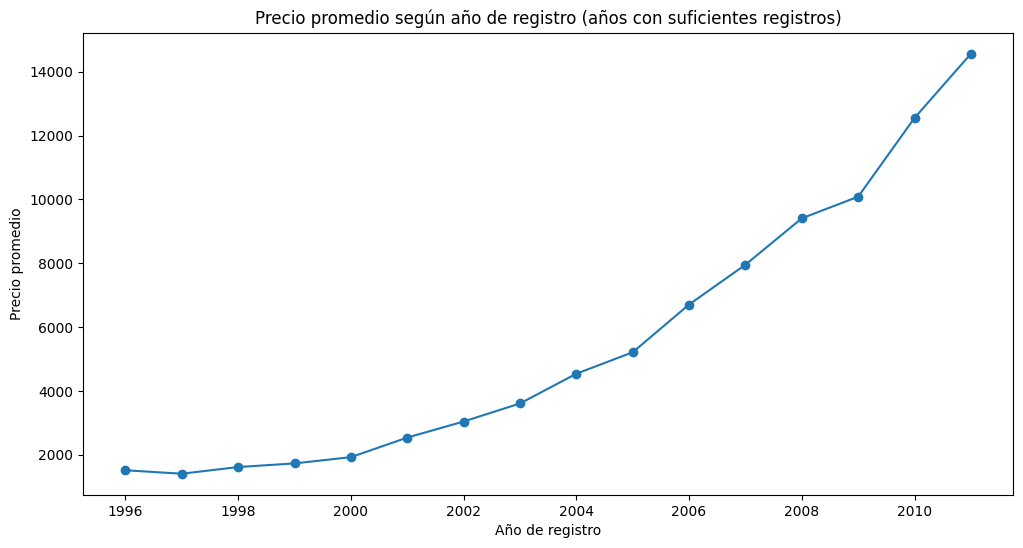

In [95]:
price_by_year = (
    df_clean_year
    .groupby('yearOfRegistration')['price']
    .mean()
)

plt.figure(figsize=(12, 6))
price_by_year.plot(kind='line', marker='o')

plt.title('Precio promedio según año de registro (años con suficientes registros)')
plt.xlabel('Año de registro')
plt.ylabel('Precio promedio')

plt.show()


In [96]:
pd.set_option('display.max_rows', None)

df_clean_year['yearOfRegistration'].value_counts().sort_index()


yearOfRegistration
1996    10408
1997    14022
1998    17218
1999    22030
2000    23117
2001    19738
2002    18820
2003    19604
2004    19469
2005    21723
2006    20000
2007    17500
2008    16026
2009    15496
2010    12250
2011    11987
Name: count, dtype: int64